In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings
warnings.filterwarnings('ignore')

In [86]:
df=pd.read_csv('C:\\Users\\Gayatri\\Desktop\\Scifor\\Saurav sir Assign\\Projects to do\\Minor Projects\Project 15.0\\titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [18]:
df.shape

(891, 12)

In [19]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Some Observations:

In [22]:
#Mean Imputation
mean = df['Age'].mean()

In [23]:
print(mean)

29.69911764705882


In [24]:
df['Age']= df['Age'].fillna(mean)

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df_feature=df.drop('Cabin',axis=1)
df_feature.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [27]:
df_feature=df_feature.isnull().sum()
df_feature

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [28]:
#Missing vlaues imputation for categorical values

obj_columns=df[['Embarked']]
obj_columns

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [29]:
obj_columns.isnull().sum()

Embarked    2
dtype: int64

In [30]:
obj_columns= obj_columns.fillna(obj_columns.mode().iloc[0])

In [31]:
obj_columns.isnull().sum()

Embarked    0
dtype: int64

## Proportion of target

In [32]:
df.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

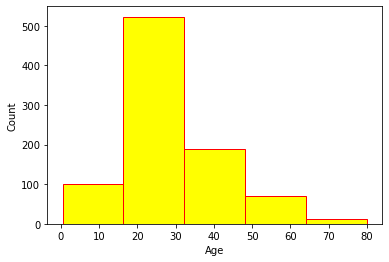

In [33]:
# plotting univariate histogram
sns.histplot(data=df, x='Age',facecolor = "yellow", edgecolor = "red", bins=5)

<AxesSubplot:ylabel='Pclass'>

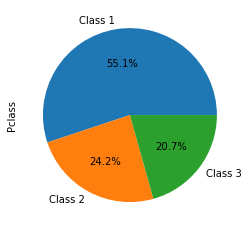

In [34]:
# with pie chart
df["Pclass"].value_counts()
df.Pclass.value_counts().plot(kind="pie", labels=['Class 1', 'Class 2', 'Class 3'], autopct='%0.1f%%')


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

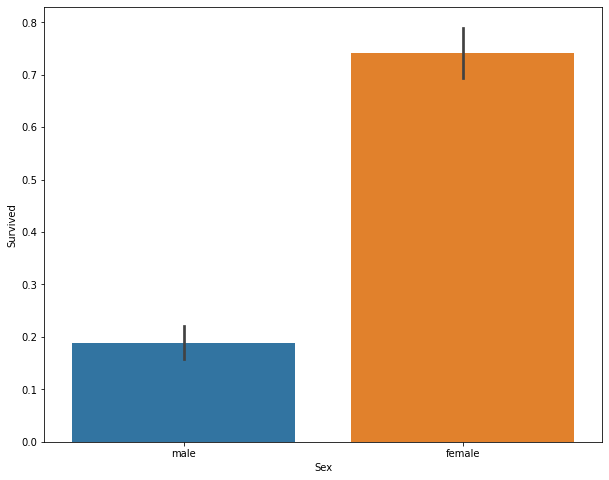

In [35]:
# Barplots
f,ax = plt.subplots(figsize=(10,8))
sns.barplot(x='Sex', y="Survived", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

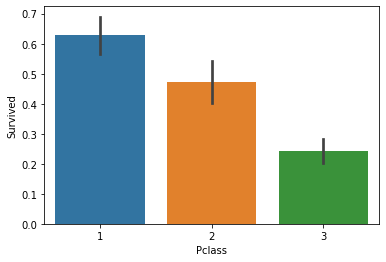

In [36]:
sns.barplot(x="Pclass",y="Survived", data =df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

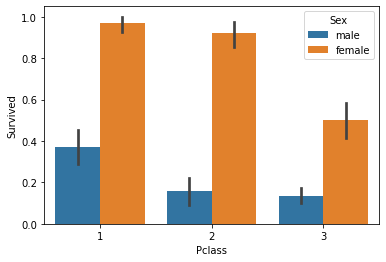

In [37]:
sns.barplot(x="Pclass", y="Survived",hue="Sex", data=df)

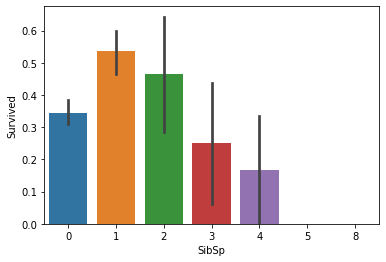

In [38]:
sns.barplot(x="SibSp", y="Survived", data=df);

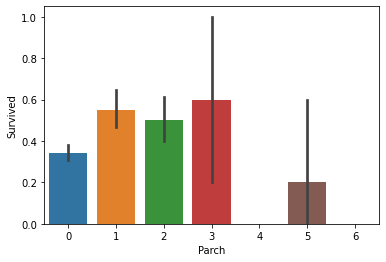

In [39]:
sns.barplot(x="Parch", y="Survived", data=df);

Text(0, 0.5, 'Age')

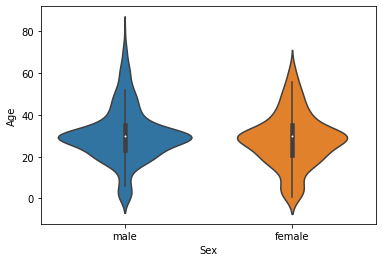

In [40]:
# Voilin plot

sns.violinplot(x='Sex',y='Age',data=df)
plt.ylabel('Age')

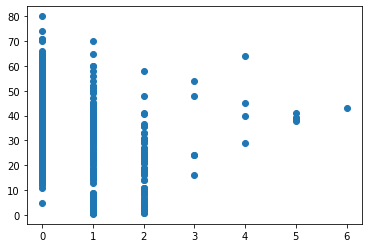

In [41]:
# Scatter Plots, 
plt.scatter(df.Parch,df.Age)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

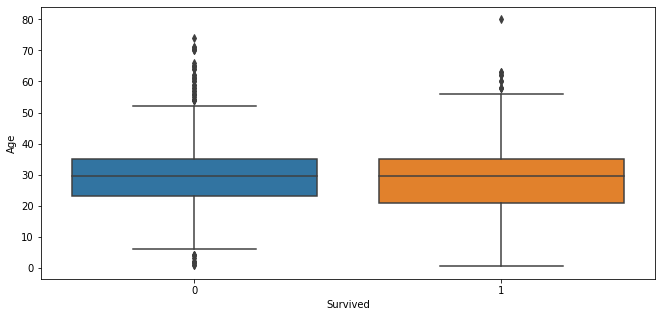

In [42]:
# BoxPlots
f,ax = plt.subplots(figsize=(11,5))
sns.boxplot(x='Survived', y='Age',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

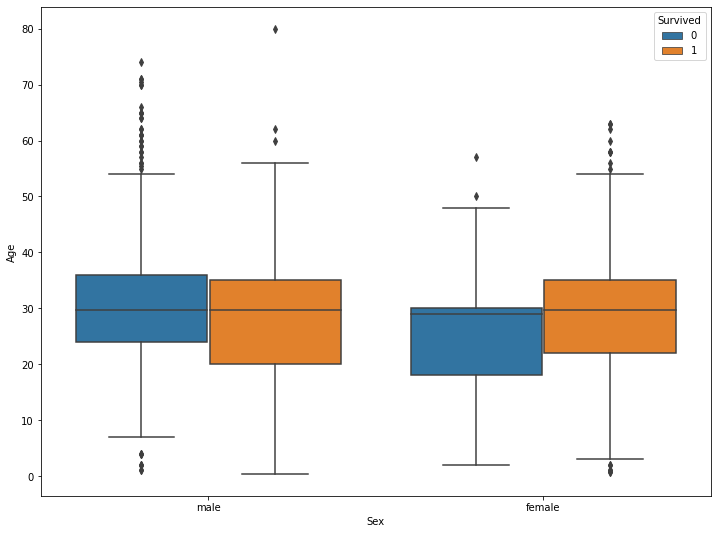

In [43]:
f, ax = plt.subplots(figsize=(12,9))
sns.boxplot(x="Sex", y="Age", hue="Survived", data=df)

In [44]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

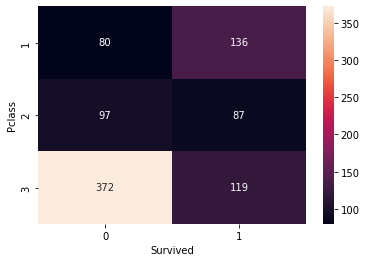

In [45]:
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [46]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [47]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [48]:
df.drop(['Name','Ticket','Sex','Embarked'],inplace=True,axis=1)

In [49]:
df=pd.concat([df,sex,embarked],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1


In [50]:
X=df.drop(['Survived','Cabin'],axis=1)
y=df['Survived']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [52]:
performance = {}

In [53]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [60]:
model1_pred=model1.predict(X_test)
performance['Logistic Regression'] = accuracy_score(y_test, model1_pred)
cross1 = cross_val_score(model1, X_train, y_train, cv=5)
print("Cross Validation Score:",cross1.mean() * 100)

Cross Validation Score: 77.93133495991634


In [61]:
confusion_matrix(y_test, model1_pred)

array([[73, 11],
       [17, 33]], dtype=int64)

In [65]:
print("Classification Report for Logistic Regression Model\n")
print(classification_report(y_test, model1_pred))

Classification Report for Logistic Regression Model

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        84
           1       0.75      0.66      0.70        50

    accuracy                           0.79       134
   macro avg       0.78      0.76      0.77       134
weighted avg       0.79      0.79      0.79       134



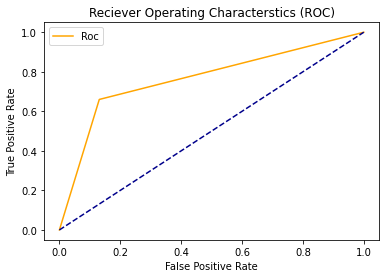

In [68]:
fpr,tpr,threshold =roc_curve(y_test,model1_pred)
plt.plot(fpr,tpr,color='orange',label='Roc')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstics (ROC)')
plt.legend()
plt.show()

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(X_train)
        print(accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(X_test)
        print(accuracy_score(y_test,pred)*100)
        print(classification_report(y_test,pred))

In [70]:
model2=RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
model2_pred=model2.predict(X_test)
performance['Random Forest Classifier'] = accuracy_score(y_test, model2_pred)
cross2=cross_val_score(model2, X_train, y_train, cv=5)
print("Cross Validation Score:",cross2.mean() * 100)

Cross Validation Score: 81.24259323806203


In [72]:
confusion_matrix(y_test, model2_pred)

array([[81,  8],
       [ 9, 36]], dtype=int64)

In [73]:
print("Classification Report for Random Forest Model\n")
print(classification_report(y_test, model2_pred))

Classification Report for Random Forest Model

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        89
           1       0.82      0.80      0.81        45

    accuracy                           0.87       134
   macro avg       0.86      0.86      0.86       134
weighted avg       0.87      0.87      0.87       134



In [74]:
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
model3_pred=model3.predict(X_test)
performance['Decision Tree Classifier']=accuracy_score(y_test,model3_pred)
cross3=cross_val_score(model3,X_train,y_train,cv=5)
print("Cross Validation Score:",cross3.mean()*100)

Cross Validation Score: 75.56378529104218


In [76]:
print("Classification Report for Decision Tree Model\n")
print(classification_report(y_test, model2_pred))

Classification Report for Decision Tree Model

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        89
           1       0.82      0.80      0.81        45

    accuracy                           0.87       134
   macro avg       0.86      0.86      0.86       134
weighted avg       0.87      0.87      0.87       134



In [87]:
performance

{'Logistic Regression': 0.7910447761194029,
 'Random Forest Classifier': 0.8731343283582089,
 'Decision Tree Classifier': 0.7985074626865671}

<AxesSubplot:>

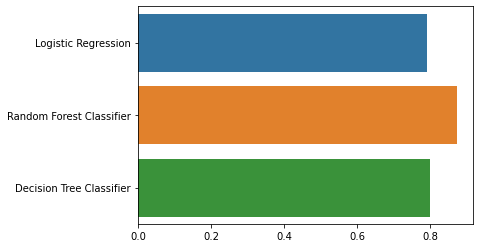

In [91]:
sns.barplot(y=list(performance.keys()), x=list(performance.values()))

In [92]:
output = pd.DataFrame({'PassengerId': X_test.index +1, 'Survived': model2_pred})
output.to_csv('Result.csv', index=False)

In [95]:
df=pd.read_csv('./Result.csv')
df.head()

,PassengerId,Survived
0,182,0
1,616,1
2,224,0
3,770,0
4,787,1
